In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from numpy import asarray

In [3]:
images = []
label = []

folder = "cell_images"
folder_dir= os.listdir(folder)

directories = [d for d in folder_dir if os.path.isdir(os.path.join("cell_images", d))]
#loading all the image data
category = 0
for d in directories:
    label_dir = os.path.join("cell_images",d)
    file_names = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith(".png")]
    
    for each in file_names:
        img = cv2.imread(each,  cv2.IMREAD_GRAYSCALE)
        imgarr = Image.fromarray(img)
        res = imgarr.resize((150,150))
        images.append(np.array(res))
        label.append(category)
    category += 1

In [4]:
#converting the data into array
Data = np.array(images)
Data= Data.astype('float32')
Data.shape

(27558, 150, 150)

In [5]:
Labels = np.array(label).astype('float32')
Labels.shape

(27558,)

In [6]:
Data_flattened = Data[:].reshape(27558,22500)
Data_flattened.shape

(27558, 22500)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Data_flattened, Labels, test_size = 0.2, stratify=Labels, random_state = 1256)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(22046, 22500)
(22046,)
(5512, 22500)
(5512,)


In [8]:
from tensorflow.keras.utils import to_categorical

y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
#normalizing data

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [10]:
x, y = x_train.shape

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(22046, 22500)
(22046, 2)
(5512, 22500)
(5512, 2)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(512, activation='relu',kernel_initializer='uniform', input_dim=y))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, kernel_initializer='uniform', activation='sigmoid'))




In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:


history = model.fit(x_train, y_train, batch_size = 256, epochs=30, validation_data=(x_test, y_test))

print(len(history.history['loss']))

Epoch 1/30
87/87 [==============================] - 29s 328ms/step - loss: 87.5241 - accuracy: 0.4956 - val_loss: 0.6940 - val_accuracy: 0.5002
Epoch 2/30
87/87 [==============================] - 25s 293ms/step - loss: 0.6935 - accuracy: 0.4962 - val_loss: 0.6939 - val_accuracy: 0.4996
Epoch 3/30
87/87 [==============================] - 24s 277ms/step - loss: 0.6931 - accuracy: 0.5002 - val_loss: 0.6939 - val_accuracy: 0.4996
Epoch 4/30
87/87 [==============================] - 21s 243ms/step - loss: 0.8499 - accuracy: 0.5002 - val_loss: 0.6939 - val_accuracy: 0.4996
Epoch 5/30
87/87 [==============================] - 23s 259ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6939 - val_accuracy: 0.4996
Epoch 6/30
87/87 [==============================] - 24s 271ms/step - loss: 0.6932 - accuracy: 0.4945 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 7/30
87/87 [==============================] - 27s 306ms/step - loss: 0.6932 - accuracy: 0.4964 - val_loss: 0.6939 - val_accuracy: 0.500

In [14]:
[test_loss, test_acc] = model.evaluate(x_test, y_test)
print("Evaluation result : Loss = {}, accuracy = {}".format(test_loss, test_acc))

173/173 [==============================] - 2s 13ms/step - loss: 0.6939 - accuracy: 0.5000
Evaluation result : Loss = 0.69394451379776, accuracy = 0.5


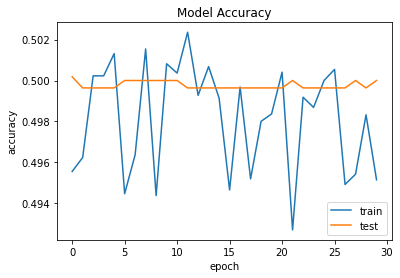

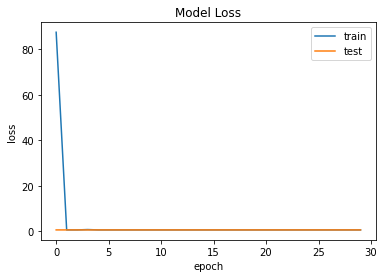

In [15]:
import matplotlib.pyplot as plt

# plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [16]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
print(pred.shape) #the predictions return in one-hot encoding format
pred = np.argmax(pred, axis=1)
print(pred.shape)
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)
print(classification_report(y_true, pred, target_names=directories))

(5512, 2)
(5512,)
(5512, 2)
              precision    recall  f1-score   support

 Parasitized       0.50      0.00      0.00      2756
  Uninfected       0.50      1.00      0.67      2756

    accuracy                           0.50      5512
   macro avg       0.50      0.50      0.33      5512
weighted avg       0.50      0.50      0.33      5512



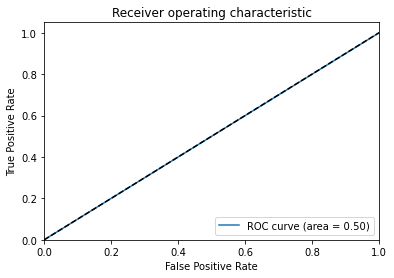

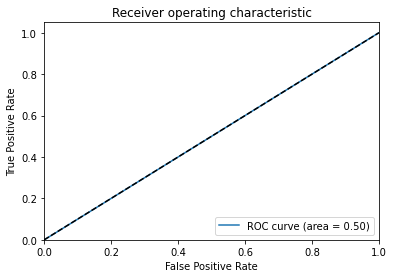

In [19]:
from sklearn.metrics import roc_curve, auc

y_predict = model.predict(x_test) # get the prediction probabilities

false_positive_rate = dict()
true_positive_rate = dict()
roc_auccuracy = dict()
for i in range(2):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_test[:, i], y_predict[:, i])
    roc_auccuracy[i] = auc(false_positive_rate[i], true_positive_rate[i])
# Plot of a ROC curve for a specific class
for i in range(2):
    plt.figure()
    plt.plot(false_positive_rate[i], true_positive_rate[i], label='ROC curve (area = %0.2f)' % roc_auccuracy[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [20]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(y_predict, axis=1)
y_te = np.argmax(y_test, axis=1)
#Generate confusion matrix
cf_matrix = confusion_matrix(y_te, y_pred)

print(cf_matrix)

[[   2 2754]
 [   2 2754]]


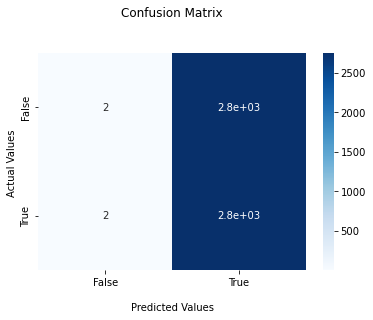

In [21]:
import seaborn as sb

plot = sb.heatmap(cf_matrix, annot=True, cmap='Blues')

plot.set_title('Confusion Matrix\n\n');
plot.set_xlabel('\nPredicted Values')
plot.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
plot.xaxis.set_ticklabels(['False','True'])
plot.yaxis.set_ticklabels(['False','True'])

## Display Confusion Matrix.
plt.show()